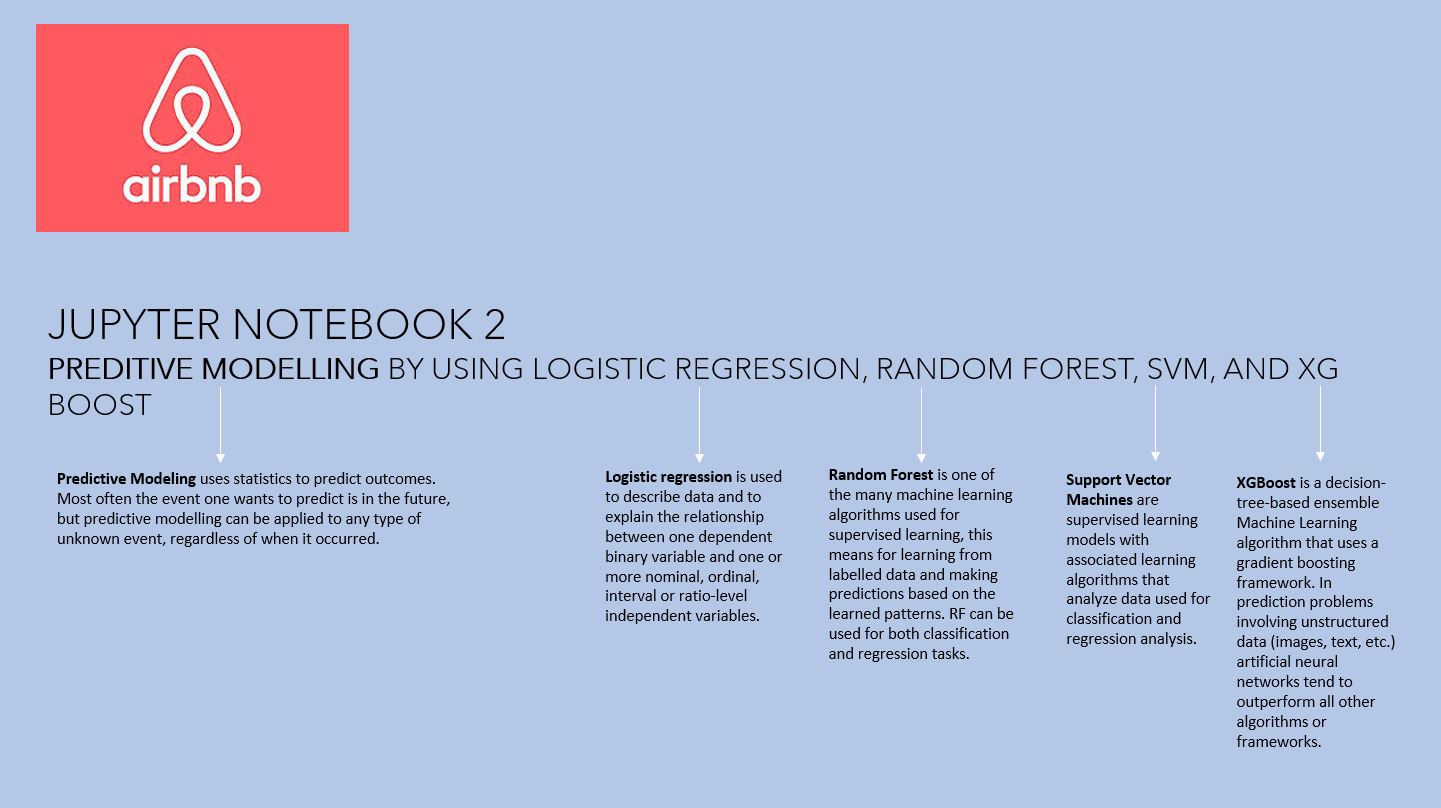

### About Airbnb

Together with Uber, the word Airbnb is synomous with the sharing economy. Airbnb is the most global online hospitality service that connects travellers with lodging from local homeowners. It is a marketplace for individuals to book or offer rooms. With services across numerous cities across the globe, Airbnb contains massive amounts of data on thousands of listings per region. There are unique listings in 81,000 cities, with over 6 million listings, in over 191 Countries.

As part of the my research, when I first started to read about Airbnb (and of course, experiencing Airbnb in many places around the world), I stumbled upon this particular article about the meaning behind the Airbnb corporate logo. The symbol itself is a combination of four simple symbols: a head to represent people, a location icon to represent place, a heart for love and then an A for Airbnb.

These three key words strike me.

PEOPLE

PLACE 

LOVE

I am currently living in Melbourne, Australia; one of the world's most multicultural metropolis is home to people from approximately 200 countries, with 233 languages spoken and 116 religious faiths represented. The city of Melbourne is one of the few places in the world that has strong creative and literature heritage, and quite forward looking as well (read: liberal). In fact, Melbourne is the second city to be designated a UNESCO City of Literature, Melbourne's literary heritage and culture is internationally recognised. 

So for Airbnb homeowners, that's an easy sell about Melbourne. Place of interest. Tick. Great people. Tick. How about LOVE?


How do we define love of people and place?
What are the possibilities of using data science to find the love of people and place? 
What outcomes can we derived from knowing love, people, and place?

This will be the start of my storytelling, and narration about three different cities very unique cities where I will relates to Airbnb and Data Science. So, why I choose Dublin, Edinburgh, and Melbourne.

1. I have been to these three cities; therefore knowing the people, place, and characteristics of Dublin, Edinburgh, and Melbourne (of course, not as deeply as the local, except for Melbourne (I am living here)).

2. Dublin, Edinburgh, and Melbourne are UNESCO city of literature; they are uniquely position as a place of love for literature and creative lovers. 

3. The notion of comparing the three unique cities will be interesting, especially on their people, place, and love for literature. 

# TABLE OF CONTENT

## INTRODUCTION
## PROJECT APPROACH AND METHODOLOGY
## PART 1 OBTAIN DATA
## PART 2 SCRUBBING DATA
## PART 3 EXPLORING DATA
## PART 4 MODEL DATA
## PART 5 INTERPRET DATA

## CONCLUSION
## LIMITATIONS AND FUTURE SCOPE

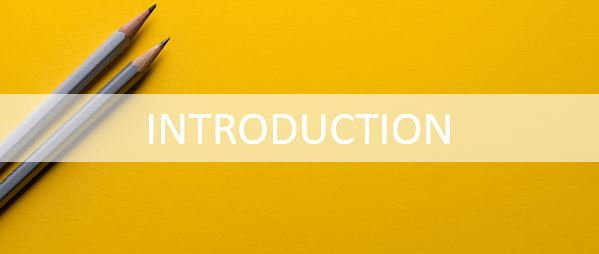

The aims of this jupyter notebook project is to analyze the latest Airbnb publicly available data from insideairbnb.com, and other sources such as public blogs (such as medium.com, airbnb.io, etc.) and news outlets (such as New York Times, and Financial Times).

This jupyter notebook project attempts to experiment and focus on the behavioural sciences of nudging and sentiment analysis. I am starting with the point of adventuring into the unknown: colliding behavioural science and data science. There could be no significant outcome; however I gut feel say there will be some (yeah, we are still human, gut feel sometimes still help, rather than base on pure data decision-making!). 

**The motivations of this jupyter notebook project are threefolds:**
>1. Situate the data: Get a firm hold of what's going on based on the listings and reviews datasets.

>2. Shift the data discussion: Once we obtain and explore the dataset, I would like to shift the data discussion to (a) the specific questions, and (b) open to any emerging insights.

>3. Transform the data discussion: Once we have answered the specific questions, and any emerging insights, I will bring forward these insights by creating Pocket Guidebooks that cater for different readers' interests or business domains. 

**The key objectives:**
>1. To develop a quick iteration process for data science - my contribution to the data science world.
>2. To develop a few Pocket Guidebooks for the purpose of interpreting in details the data from this Jupyter Notebook P
Project - my own data interpretation into business-speak, actionable insights.
>3. To understand and compare 4 predictive modeling techniques in determining great Airbnb host ratings.
>4. To determine whether the main predictors of great Airbnb host ratings.


### PROJECT APPROACH AND METHODOLOGY

This jupyter notebook project applies mostly predictive modeling techniques of logistics regression, support vector machine, XG Boost, and random forest - within the data science context to draw out Airbnb rating insights.


In my earlier Jupyter Notebook project (https://github.com/andrewwongls/dsc-4-final-project-online-ds-sp-000/blob/master/student.ipynb), I have introduced, and discussed on the followings:
1. Design sprint + Data science.
2. How I spent my time as a Product Data Scientist.

Here I'd like to further my discussion data science related skill (rapid data iteration), and the left and right side Data Scientist. 

#### RAPID DATA ITERATION

After spending more than 1,500 hours of tweaking/wrangling data, collaborating with others, and drawing on my knowledge in agile development, I have developed a technique that I have been using to do rapid data iteration (see below). See my Medium Blog for further information here: In Medium Blog - Search for Andrew Wong + The quick wins (and the long game) of datasets)

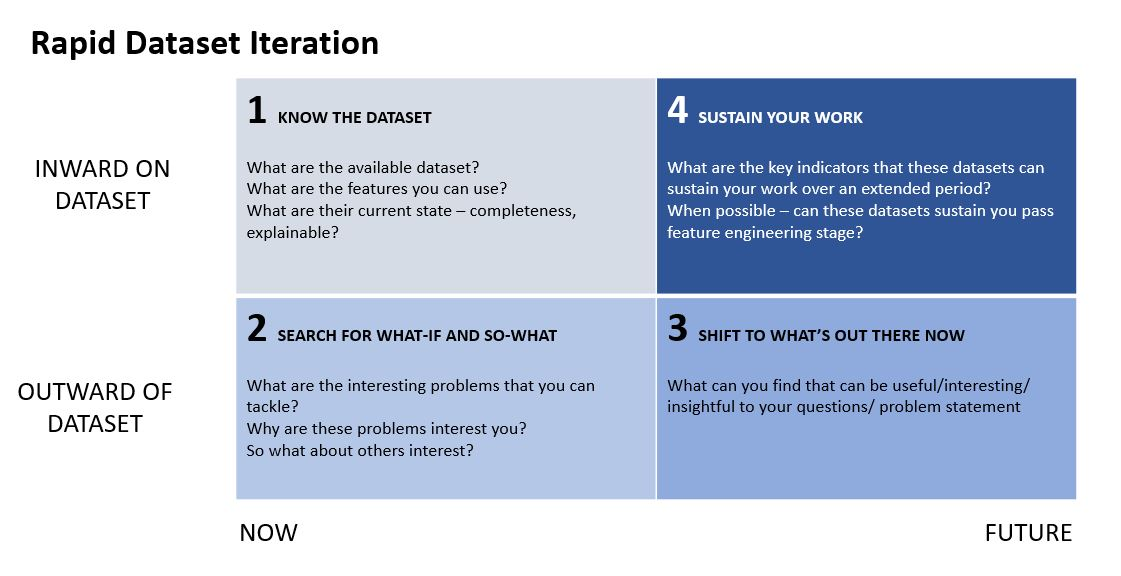



#### LEFT AND RIGHT SIDE DATA SCIENTIST

Earlier on, I wrote about How I Spent My Time as Product Data Scientist on Medium Blog. This piece is a further development based on my next 200 hours of iteration as a data scientist. See my Medium Blog for further information here: 


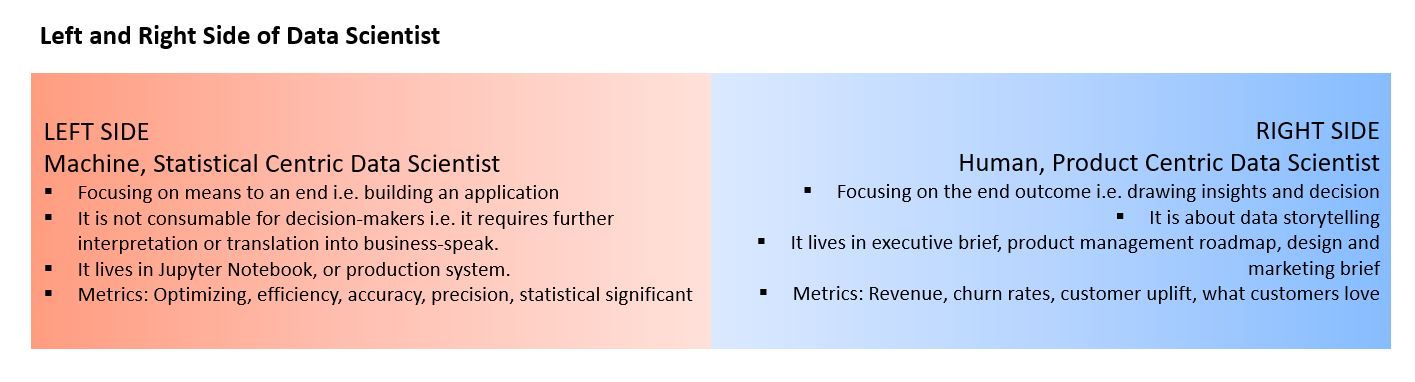


### IMPORTING LIBRARIES

In [4]:
# importing necessary libraries

import pandas as pd
from pandas.tools import plotting
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import Counter
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, plot, iplot
import seaborn as sns
import xgboost as xgb
from datetime import datetime
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline
plt.style.use('seaborn')
mpl.style.use('ggplot')
sns.set(style='whitegrid')

# importing map visulization libraries
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from geopy.distance import vincenty

# importing Sci-kit Learn libraries
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Imputer, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report, accuracy_score, roc_curve, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

# importing Natural Language Toolkits
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# importing Sci-py libraries
from scipy.stats import ttest_ind

# importing statsmodels to perform statistical analysis
import statsmodels.api as sm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
from statsmodels.formula.api import ols

# importing Predictive Analytics/ Machine Learning libraries
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers


# for oversampling library (dealing with Imbalanced Datasets)
from collections import Counter

# other libraries
import time

# printing style available
print(plt.style.available)

# importing Predictive Analytics/ Machine Learning libraries
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Change pandas viewing options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Using TensorFlow backend.


['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


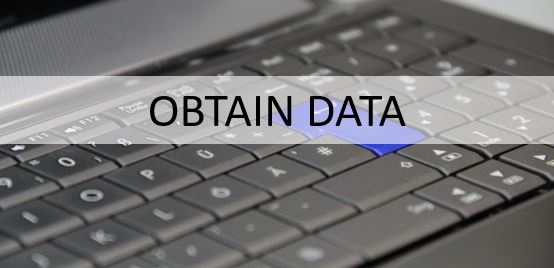

# PART 1 OBTAINING DATA ON AIRBNB LISTINGS AND REVIEWS

First stop, obtaining data, and a sneak peek at the Airbnb Dublin's dataset.

In [5]:
# obtaining dataset from inside airbnb for dublin

dublin_reviews = pd.read_csv('dublin_reviews.csv.gz', compression='gzip', low_memory=True)
dublin_listings = pd.read_csv('dublin_listings.csv.gz', compression='gzip', low_memory=True)
dublin_reviews.head(5)
dublin_listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20190625153105,2019-06-25,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,"Hi, My name is Teresa and we have 3 rooms ava...",Our house was built in 1937 when there was ple...,none,I like our neighbourhood as there is no shorta...,Dundrum was always known as a Spa Town and the...,There is a bus stop 2 mins up the road from us...,We have a beautiful landscaped garden with tab...,We live on the premises so we are always on ha...,Welcome to our cottage and we hope you will en...,NaN,NaN,https://a0.muscache.com/im/pictures/525706/050...,NaN,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,Dublin Ireland,"I am a friendly outgoing Irishwoman ,who love...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Churchtown, Ireland",Churchtown,Dn Laoghaire-Rathdown,NaN,Churchtown,NaN,Dublin 14,Dublin,"Churchtown, Ireland",IE,Ireland,53.28995,-6.25813,t,Bed and breakfast,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,$50.00,NaN,NaN,NaN,$10.00,1,$0.00,3,60,3,3,60,60,3.0,60.0,yesterday,t,8,11,32,276,2019-06-25,202,46,2011-03-20,2019-06-14,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,moderate,t,t,3,0,3,0,2.01
1,68483,https://www.airbnb.com/rooms/68483,20190625153105,2019-06-25,Unique Central Dublin River-view,"My apartment provides an immaculate, comfortab...",My apartment overlooks the River Liffey with i...,"My apartment provides an immaculate, comfortab...",none,"Numerous great cafés, bars, 24 hour shops, gal...",I always share my view of the red giant Betelg...,"buses, Luas, tram, camels, train, rickshaws, D...",Access all areas!,"We go bungee jumping off the Cliffs of Moher, ...","No noise, no smoking, no parties, no unbooked ...",NaN,NaN,https://a0.muscache.com/im/pictures/830417/ec7...,NaN,339817,https://www.airbnb.com/users/show/339817,John,2011-01-08,Dublin,I am a visual artist and part-time lecturer at...,within an hour,100%,NaN,f,https://a0.muscache.com/im/users/339817/profil...,https://a0.muscache.com/im/users/339817/profil...,Temple Ba

Second stop is to obtain Airbnb Edinburgh's dataset, and a sneak peek into the reviews and listings.

In [6]:
# obtaining dataset from inside airbnb for edinburgh

edinburgh_reviews = pd.read_csv('edinburgh_reviews.csv.gz', compression='gzip', low_memory=True)
edinburgh_listings = pd.read_csv('edinburgh_listings.csv.gz', compression='gzip', low_memory=True)
edinburgh_reviews.head(5)
edinburgh_listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,15420,https://www.airbnb.com/rooms/15420,20190625184115,2019-06-25,Georgian Boutique Apt City Centre,"Stunning, impeccably refurbished spacious grou...",This is a huge and luxurious apartment for 2 -...,"Stunning, impeccably refurbished spacious grou...",none,"The neighbourhood is in the historic New Town,...",Please note that because of my interest in int...,It is easy to walk to many of the main tourist...,Guests have full access at the apartment. All...,Guests will be sent full details of what is su...,The apartment is strictly non-smoking and we r...,NaN,NaN,https://a0.muscache.com/im/pictures/cf69631f-4...,NaN,60423,https://www.airbnb.com/users/show/60423,Charlotte,2009-12-06,"Edinburgh, Scotland, United Kingdom","I have a background in property, having worked...",within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/60423/profile...,https://a0.muscache.com/im/users/60423/profile...,NaN,3.0,3.0,"['email', 'phone', 'manual_online', 'reviews',...",t,t,"Edinburgh, City of Edinburgh, United Kingdom",New Town,"Old Town, Princes Street and Leith Street",NaN,Edinburgh,City of Edinburgh,EH1 3LD,Edinburgh,"Edinburgh, United Kingdom",GB,United Kingdom,55.95689,-3.18768,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Wheelchair accessible"",Kitc...",861.0,$80.00,NaN,NaN,$200.00,$40.00,1,$0.00,3,30,1,3,30,30,2.9,30.0,today,t,6,12,22,193,2019-06-25,283,60,2011-01-18,2019-06-23,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,2.76
1,24288,https://www.airbnb.com/rooms/24288,20190625184115,2019-06-25,"Cool central Loft, sleeps 4, 2 double bed+en-s...",Boho rustic-chic former warehouse Loft located...,"Two bedroom, very central Loft apartment with ...",Boho rustic-chic former warehouse Loft located...,none,It's all in the mix: Culture-museums and galle...,The apartment is in the City centre so being a...,Walk to key central attractions or catch a bus...,The whole flat on the first floor and utility ...,Will meet guests on arrival and at check-out i...,Non smokers only and no smoking in the buildin...,NaN,NaN,https://a0.muscache.com/im/pictures/3460007/88...,NaN,46498,https://www.airbnb.com/users/show/46498,Gordon,2009-10-17,"Edinburgh, Scotland, United Kingdom",

Last stop, my favourite city because that's where I am living right now. Obtaining Airbnb Melbourne's dataset, and sneak peek into listings and reviews. 

In [7]:
# obtaining dataset from inside airbnb for melbourne

melbourne_reviews = pd.read_csv('melbourne_reviews.csv.gz', compression='gzip', low_memory=True)
melbourne_listings = pd.read_csv('melbourne_listings.csv.gz', compression='gzip', low_memory=True)
melbourne_reviews.head(5)
melbourne_listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,20190709174122,2019-07-10,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",none,Very safe! Family oriented. Older age group.,NaN,"YES ! The bus (305,309) is exactly two blocks ...","Kitchen, backyard, upstairs lounge. We'd like ...",As much as the guest wants.,Prefence would be given females or a couple,NaN,NaN,https://a0.muscache.com/im/pictures/44620/5a58...,NaN,33057,https://www.airbnb.com/users/show/33057,Manju,2009-08-21,AU,About us: We are an East Indian couple in our ...,NaN,NaN,NaN,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,1.0,1.0,"['email', 'phone', 'reviews']",f,f,"Bulleen, VIC, Australia",Balwyn North,Manningham,NaN,Bulleen,VIC,3105,Melbourne,"Bulleen, Australia",AU,Australia,-37.77268,145.09213,f,House,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,""Pets live on this property"",Do...",NaN,$61.00,NaN,NaN,NaN,NaN,1,$22.00,1,365,1,1,365,365,1.0,365.0,24 months ago,t,30,60,90,365,2019-07-10,4,0,2011-05-24,2015-09-12,90.0,9.0,10.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.04
1,10803,https://www.airbnb.com/rooms/10803,20190709174122,2019-07-10,Room in Cool Deco Apartment in Brunswick East,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,none,This hip area is a crossroads between two grea...,NaN,Easy transport options - the tram is right out...,Wifi. Bathroom and kitchen is shared but I mos...,I'm home mostly but sometimes I may be working...,Theres a yoga studio downstairs so if you see ...,NaN,NaN,https://a0.muscache.com/im/pictures/31323790/9...,NaN,38901,https://www.airbnb.com/users/show/38901,Lindsay,2009-09-16,"Melbourne, Victoria, Australia",As an artist working in animation and video I ...,within an hour,100%,NaN,t,https://a0.muscache.com/im/users/38901/profile...,https://a0.muscache.com/im/users/38901/profile...,Brunswick,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Brunswick East, VIC, Australia",Brunswick,Moreland,NaN,Brunswick East,VIC,3057,Melbourne,"Brunswick East, 

There are a lot more reviews and listing on Melbourne, as compared to Edinburgh (doubling), and Dublin (tripling). This may be an indication of more Airbnb listings in Melbourne, and that Melbourne has more international and domestic tourists (Melbourne is closer to Asia than Edinburgh and Dublin, where there is a boom of middleclass Asia tourist).

In [8]:
# checking the rows and columns

dublin_listings.shape, edinburgh_listings.shape, melbourne_listings.shape

((9902, 106), (13245, 106), (23999, 106))

I am going to concatenate Dublin, Edinburgh, and Melbourne's dataset of listings, so that I can start to scrub the data.

In [9]:
# concatenating the listing for the three cities

all_listings = pd.concat([dublin_listings, edinburgh_listings, melbourne_listings],
                        keys = [1, 2, 3])
all_listings.reset_index(level=0, inplace=True)
all_listings.rename(columns={'level_0': 'city_index'}, inplace=True)
all_listings.head(20)

,city_index,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1,44077,https://www.airbnb.com/rooms/44077,20190625153105,2019-06-25,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,"Hi, My name is Teresa and we have 3 rooms ava...",Our house was built in 1937 when there was ple...,none,I like our neighbourhood as there is no shorta...,Dundrum was always known as a Spa Town and the...,There is a bus stop 2 mins up the road from us...,We have a beautiful landscaped garden with tab...,We live on the premises so we are always on ha...,Welcome to our cottage and we hope you will en...,NaN,NaN,https://a0.muscache.com/im/pictures/525706/050...,NaN,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,Dublin Ireland,"I am a friendly outgoing Irishwoman ,who love...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Churchtown, Ireland",Churchtown,Dn Laoghaire-Rathdown,NaN,Churchtown,NaN,Dublin 14,Dublin,"Churchtown, Ireland",IE,Ireland,53.28995,-6.25813,t,Bed and breakfast,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,$50.00,NaN,NaN,NaN,$10.00,1,$0.00,3,60,3,3,60,60,3.0,60.0,yesterday,t,8,11,32,276,2019-06-25,202,46,2011-03-20,2019-06-14,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,moderate,t,t,3,0,3,0,2.01
1,1,68483,https://www.airbnb.com/rooms/68483,20190625153105,2019-06-25,Unique Central Dublin River-view,"My apartment provides an immaculate, comfortab...",My apartment overlooks the River Liffey with i...,"My apartment provides an immaculate, comfortab...",none,"Numerous great cafés, bars, 24 hour shops, gal...",I always share my view of the red giant Betelg...,"buses, Luas, tram, camels, train, rickshaws, D...",Access all areas!,"We go bungee jumping off the Cliffs of Moher, ...","No noise, no smoking, no parties, no unbooked ...",NaN,NaN,https://a0.muscache.com/im/pictures/830417/ec7...,NaN,339817,https://www.airbnb.com/users/show/339817,John,2011-01-08,Dublin,I am a visual artist and part-time lecturer at...,within an hour,100%,NaN,f,https://a0.muscache.com/im/users/339817/profil...,https://a0.muscache.com/im/users/339817/prof

In [10]:
# checking the listing for all 

all_listings.info(all)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47146 entries, 0 to 23998
Data columns (total 107 columns):
city_index                                      int64
id                                              int64
listing_url                                     object
scrape_id                                       int64
last_scraped                                    object
name                                            object
summary                                         object
space                                           object
description                                     object
experiences_offered                             object
neighborhood_overview                           object
notes                                           object
transit                                         object
access                                          object
interaction                                     object
house_rules                                     object
thumbnail_url

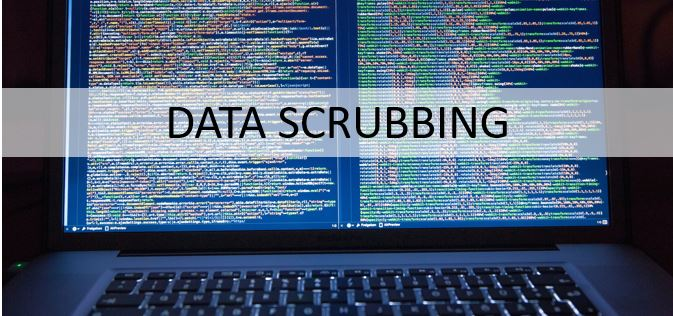

# PART 2 SCRUBBING DATA ON AIRBNB LISTINGS ONLY

#### SCRUBBING 1 REMOVE NOISY DATA

In [11]:
# checking and removing noisy data such as zero non-null values by masking these data

unique_nums = all_listings.nunique()
masked_columns = [col for col in all_listings.columns if unique_nums[col] == 0]
masked_columns

['thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_acceptance_rate',
 'neighbourhood_group_cleansed',
 'jurisdiction_names']

In [12]:
# masking the noisy data

Counter(all_listings.license.dropna())
masked_columns.append('license')

In [13]:
# checking one more time

all_listings.head(20)

,city_index,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1,44077,https://www.airbnb.com/rooms/44077,20190625153105,2019-06-25,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,"Hi, My name is Teresa and we have 3 rooms ava...",Our house was built in 1937 when there was ple...,none,I like our neighbourhood as there is no shorta...,Dundrum was always known as a Spa Town and the...,There is a bus stop 2 mins up the road from us...,We have a beautiful landscaped garden with tab...,We live on the premises so we are always on ha...,Welcome to our cottage and we hope you will en...,NaN,NaN,https://a0.muscache.com/im/pictures/525706/050...,NaN,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,Dublin Ireland,"I am a friendly outgoing Irishwoman ,who love...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Churchtown, Ireland",Churchtown,Dn Laoghaire-Rathdown,NaN,Churchtown,NaN,Dublin 14,Dublin,"Churchtown, Ireland",IE,Ireland,53.28995,-6.25813,t,Bed and breakfast,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,$50.00,NaN,NaN,NaN,$10.00,1,$0.00,3,60,3,3,60,60,3.0,60.0,yesterday,t,8,11,32,276,2019-06-25,202,46,2011-03-20,2019-06-14,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,moderate,t,t,3,0,3,0,2.01
1,1,68483,https://www.airbnb.com/rooms/68483,20190625153105,2019-06-25,Unique Central Dublin River-view,"My apartment provides an immaculate, comfortab...",My apartment overlooks the River Liffey with i...,"My apartment provides an immaculate, comfortab...",none,"Numerous great cafés, bars, 24 hour shops, gal...",I always share my view of the red giant Betelg...,"buses, Luas, tram, camels, train, rickshaws, D...",Access all areas!,"We go bungee jumping off the Cliffs of Moher, ...","No noise, no smoking, no parties, no unbooked ...",NaN,NaN,https://a0.muscache.com/im/pictures/830417/ec7...,NaN,339817,https://www.airbnb.com/users/show/339817,John,2011-01-08,Dublin,I am a visual artist and part-time lecturer at...,within an hour,100%,NaN,f,https://a0.muscache.com/im/users/339817/profil...,https://a0.muscache.com/im/users/339817/prof

In [14]:
# masking Part 2

masked_columns = ['id', 'listing_url', 'scrape_id', 'last_scraped']

In [15]:
all_listings.drop(masked_columns, axis=1, inplace=True)

#### SCRUBBING 2 TRANSPOSING CATEGORICAL DATA INTO NUMERICAL DATA

SIDE NOTE: 

Categorical Data: In statistics, a categorical variable is a variable that can take on one of a limited, and usually fixed number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property.

Numerical Data: These data have meaning as a measurement, such as a person’s height, weight, etc. Numerical data can be further broken into two types: discrete and continuous. Discrete data represent items that can be counted; they take on possible values that can be listed out. Continuous data represent measurements; their possible values cannot be counted and can only be described using intervals on the real number line.

In [16]:
# The $ sign creates a categorical data; this needs to be removed

price_cols = ['price', 
              'weekly_price', 
              'monthly_price', 
              'security_deposit', 
              'cleaning_fee', 
              'extra_people']

In [17]:
# checking and confirming

all_listings.head(1).price.values

array(['$50.00'], dtype=object)

In [18]:
p1 = '$50.00'

This looks good now.

In [19]:
# conversion in the making 

def prices_to_numbers(price_string):
    '''
    Converts USD prices from string to numeric format
    
    Args:
        price_string (string): USD price in string format (e.g., '$88.00')
    
    Returns:
        price_numeric (float): USD price in numeric format (e.g., 88.00)
    '''
    
    price_numeric = float(str(price_string).replace(',', '').split('$')[-1])
    return price_numeric

prices_to_numbers(p1)

50.0

In [20]:
for col in price_cols:
    print(col)
    all_listings[col] = all_listings[col].apply(prices_to_numbers)

price
weekly_price
monthly_price
security_deposit
cleaning_fee
extra_people


#### SCRUBBING 3 TRANSPOSING BOOLEANS INTO NUMERICAL DATA

In [21]:
# reviewing the updated all listing again to search for booleans

all_listings.head(10)

,city_index,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,"Hi, My name is Teresa and we have 3 rooms ava...",Our house was built in 1937 when there was ple...,none,I like our neighbourhood as there is no shorta...,Dundrum was always known as a Spa Town and the...,There is a bus stop 2 mins up the road from us...,We have a beautiful landscaped garden with tab...,We live on the premises so we are always on ha...,Welcome to our cottage and we hope you will en...,NaN,NaN,https://a0.muscache.com/im/pictures/525706/050...,NaN,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,Dublin Ireland,"I am a friendly outgoing Irishwoman ,who love...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Churchtown, Ireland",Churchtown,Dn Laoghaire-Rathdown,NaN,Churchtown,NaN,Dublin 14,Dublin,"Churchtown, Ireland",IE,Ireland,53.28995,-6.25813,t,Bed and breakfast,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,50.0,NaN,NaN,NaN,10.0,1,0.0,3,60,3,3,60,60,3.0,60.0,yesterday,t,8,11,32,276,2019-06-25,202,46,2011-03-20,2019-06-14,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,moderate,t,t,3,0,3,0,2.01
1,1,Unique Central Dublin River-view,"My apartment provides an immaculate, comfortab...",My apartment overlooks the River Liffey with i...,"My apartment provides an immaculate, comfortab...",none,"Numerous great cafés, bars, 24 hour shops, gal...",I always share my view of the red giant Betelg...,"buses, Luas, tram, camels, train, rickshaws, D...",Access all areas!,"We go bungee jumping off the Cliffs of Moher, ...","No noise, no smoking, no parties, no unbooked ...",NaN,NaN,https://a0.muscache.com/im/pictures/830417/ec7...,NaN,339817,https://www.airbnb.com/users/show/339817,John,2011-01-08,Dublin,I am a visual artist and part-time lecturer at...,within an hour,100%,NaN,f,https://a0.muscache.com/im/users/339817/profil...,https://a0.muscache.com/im/users/339817/profil...,Temple Bar,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Dublin, County Dublin, Ireland",Temple Bar,Dublin City,NaN,Dublin,County Dublin,Dublin 2,Dublin,"Dublin, Ireland",IE

SIDE NOTE: What is Booleans? Boolean, or boolean logic, is a subset of algebra used for creating true/false statements. Boolean expressions use the operators AND, OR, XOR, and NOT to compare values and return a true or false result.

I am going to convert 't' to 1, and 'f' to 0.


In [22]:
# naming the boolean columns

boolean_cols = ['host_is_superhost', 
               'is_business_travel_ready',
               'host_has_profile_pic',
               'requires_license',
               'host_identity_verified',
               'is_location_exact',
               'has_availability',
               'instant_bookable',
               'require_guest_profile_picture',
               'require_guest_phone_verification']

In [23]:
# conversion in the making

def booleans_to_numbers(s):
    '''
    Converts "first letter boolean" strings to integers
    
    Args:
        bool_string (string): 't', 'f' or other
    
    Returns:
        bool_number (int): 1, 0 or None
    '''
    
    
    if s == 'f':
        return 0
    elif s == 't':
        return 1
    return None

In [24]:
# conversion in the making

for col in boolean_cols:
    print(col)
    all_listings[col] = all_listings[col].apply(booleans_to_numbers)

host_is_superhost
is_business_travel_ready
host_has_profile_pic
requires_license
host_identity_verified
is_location_exact
has_availability
instant_bookable
require_guest_profile_picture
require_guest_phone_verification


#### SCRUBBING 4 REMOVE NOISY DATA PART 2

There is a lot more noisy data than I realized. This needs to be removed to reduce noise in the dataset, therefore create a cleaner dataset for modelling later.

In [25]:
# checking the noisy data

all_listings.select_dtypes(object).head(10)

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,property_type,room_type,bed_type,amenities,calendar_updated,calendar_last_scraped,first_review,last_review,license,cancellation_policy
0,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,"Hi, My name is Teresa and we have 3 rooms ava...",Our house was built in 1937 when there was ple...,none,I like our neighbourhood as there is no shorta...,Dundrum was always known as a Spa Town and the...,There is a bus stop 2 mins up the road from us...,We have a beautiful landscaped garden with tab...,We live on the premises so we are always on ha...,Welcome to our cottage and we hope you will en...,https://a0.muscache.com/im/pictures/525706/050...,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,Dublin Ireland,"I am a friendly outgoing Irishwoman ,who love...",within an hour,100%,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,"['email', 'phone', 'facebook', 'reviews', 'jum...","Churchtown, Ireland",Churchtown,Dn Laoghaire-Rathdown,Churchtown,NaN,Dublin 14,Dublin,"Churchtown, Ireland",IE,Ireland,Bed and breakfast,Private room,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",yesterday,2019-06-25,2011-03-20,2019-06-14,NaN,moderate
1,Unique Central Dublin River-view,"My apartment provides an immaculate, comfortab...",My apartment overlooks the River Liffey with i...,"My apartment provides an immaculate, comfortab...",none,"Numerous great cafés, bars, 24 hour shops, gal...",I always share my view of the red giant Betelg...,"buses, Luas, tram, camels, train, rickshaws, D...",Access all areas!,"We go bungee jumping off the Cliffs of Moher, ...","No noise, no smoking, no parties, no unbooked ...",https://a0.muscache.com/im/pictures/830417/ec7...,https://www.airbnb.com/users/show/339817,John,2011-01-08,Dublin,I am a visual artist and part-time lecturer at...,within an hour,100%,https://a0.muscache.com/im/users/339817/profil...,https://a0.muscache.com/im/users/339817/profil...,Temple Bar,"['email', 'phone', 'reviews']","Dublin, County Dublin, Ireland",Temple Bar,Dublin City,Dublin,County Dublin,Dublin 2,Dublin,"Dublin, Ireland",IE,Ireland,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",3 weeks ago,2019-06-25,2011-04-04,2019-04-08,NaN,moderate
2,Number Nine : Ballsbridge,"Cosy and comfortable, the cottage is a surpris...",Number Nine is also the ideal spot for your we...,"Cosy and comfortable, the cottage is a surpris...",business,Ballsbridge has lots of amenitites: restaurant...,We can't provide parking for this property; al...,We are very well connected to Dublin's Public ...,The cottage is not occupied by anyone but you ...,"We try our best to meet our guests on arrival,...",All that is required is respect; anything less...,https://a0.muscache.com/im/pictures/589205/9f1...,https://www.airbnb.com/users/show/205636,Marie-Louise,2010-08-18,Dublin,I am an artist living and working between Dubl...,within a few hours,80%,https://a0.muscache.com/im/users/205636/profil...,https://a0.muscache.com/im/users/205636/profil...,Ballsbridge,"['email', 'phone', 'facebook', 'reviews', 'jum...","Dublin, Dublin, Ireland",Ballsbridge,Dublin City,Dublin,Dublin,NaN,Dublin,"Dublin, Ireland",IE,Ireland,Cabin,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Indoor f...",3 weeks ago,2019-06-25,2011-02-25,2019-06-09,NaN,strict_14_with_grace_period
3,Habitación en Dublín Double room,NaN,I'm renting a double room in my house in the s...,I'm renting a double room in my house in the s...,none,NaN,NaN,Na

In [26]:
# selecting and naming textual and datetime columns

textual_datetime_cols = ['name',
                        'summary',
                        'space',
                        'description',
                        'neighborhood_overview',
                        'notes',
                        'transit',
                        'access',
                        'interaction',
                        'host_name',
                        'host_location',
                        'host_about',
                        'host_neighbourhood',
                        'street',
                        'neighbourhood',
                        'neighbourhood_cleansed',
                        'neighbourhood_group_cleansed',
                        'state',
                        'zipcode',
                        'market',
                        'smart_location',
                        'city',
                        'country_code',
                        'country', 
                        'calendar_updated', 
                        'calendar_last_scraped', 
                        'first_review',
                        'last_review', 
                        'jurisdiction_names',
                        'experiences_offered']

In [27]:
# dropping these noisy data columns

all_listings.drop(textual_datetime_cols, axis=1, inplace=True)

In [28]:
# checking the updated all listings

all_listings.head(10)

,city_index,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1,Welcome to our cottage and we hope you will en...,NaN,NaN,https://a0.muscache.com/im/pictures/525706/050...,NaN,193005,https://www.airbnb.com/users/show/193005,2010-08-06,within an hour,100%,NaN,1.0,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",1.0,0.0,53.28995,-6.25813,1,Bed and breakfast,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,50.0,NaN,NaN,NaN,10.0,1,0.0,3,60,3,3,60,60,3.0,60.0,1,8,11,32,276,202,46,95.0,10.0,10.0,10.0,10.0,10.0,10.0,0,NaN,1,0,moderate,1,1,3,0,3,0,2.01
1,1,"No noise, no smoking, no parties, no unbooked ...",NaN,NaN,https://a0.muscache.com/im/pictures/830417/ec7...,NaN,339817,https://www.airbnb.com/users/show/339817,2011-01-08,within an hour,100%,NaN,0.0,https://a0.muscache.com/im/users/339817/profil...,https://a0.muscache.com/im/users/339817/profil...,1.0,1.0,"['email', 'phone', 'reviews']",1.0,0.0,53.34501,-6.26552,1,Apartment,Entire home/apt,2,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",0.0,88.0,NaN,NaN,NaN,NaN,1,42.0,3,30,3,3,30,30,3.0,30.0,1,0,1,2,222,102,6,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,NaN,0,0,moderate,1,1,1,1,0,0,1.02
2,1,All that is required is respect; anything less...,NaN,NaN,https://a0.muscache.com/im/pictures/589205/9f1...,NaN,205636,https://www.airbnb.com/users/show/205636,2010-08-18,within a few hours,80%,NaN,0.0,https://a0.muscache.com/im/users/205636/profil...,https://a0.muscache.com/im/users/205636/profil...,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",1.0,1.0,53.33149,-6.23215,0,Cabin,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Indoor f...",1076.0,130.0,675.0,2335.0,300.0,25.0,2,10.0,3,28,3,3,28,28,3.0,28.0,1,2,7,11,81,172,13,96.0,10.0,9.0,10.0,10.0,10.0,9.0,0,NaN,0,0,strict_14_with_grace_period,1,0,2,2,0,0,1.70
3,1,"Sorry, No smoking or pets. Lo siento esta proh...",NaN,NaN,https://a0.muscache.com/im/pictures/583752/61c...,NaN,466111,https://www.airbnb.com/users/show/466111,2011-03-27,NaN,NaN,NaN,0.0,https://a0.muscache.com/im/users/466111/profil...,https://a0.muscache.com/im/users/466111/profil...,1.0,1.0,"['email', 'phone', 'reviews']",1.0,0.0,53.30110,-6.31992,1,House,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Free parking on p...",NaN,30.0,200.0,700.0,NaN,NaN,1,10.0,1,5,1,1,5,5,1.0,5.0,1,0,0,0,175,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,flexible,0,0,1,0,1,0,0.65
4,1,Welcome to our cottage and we hope you will en...,NaN,NaN,https://a0.muscache.com/im/pictures/1749253/9e...,NaN,193005,https://www.ai

#### SCRUBBING 5 TRANSPOSING ORDINAL NUMBERS INTO INTEGERS

SIDE NOTE: An Ordinal Number is a number that tells the position of something in a list, such as 1st, 2nd, 3rd, 4th, 5th etc. An integer is a whole number (not a fractional number) that can be positive, negative, or zero. Examples of integers are: -5, 1, 5, 8, 97, and 3,043. Examples of numbers that are not integers are: -1.43, 1 3/4, 3.14.

In [29]:
# one of the ordinal data is the host response time

all_listings.host_response_time.unique()

array(['within an hour', 'within a few hours', nan, 'a few days or more',
       'within a day'], dtype=object)

In [30]:
# transposing ordinal into integer

host_response_dict = {'within an hour': 1, 
                      'within a few hours': 2, 
                      'within a day': 3,
                     'a few days or more': 4}

all_listings.host_response_time.replace(host_response_dict, inplace=True)

#### SCRUBBING 6 SIMPLIFYING COLUMNS

In [31]:
# first stop, checking the host verfications which has plenty of data columns

all_listings.host_verifications.head(10).values

array(["['email', 'phone', 'facebook', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']",
       "['email', 'phone', 'reviews']",
       "['email', 'phone', 'facebook', 'reviews', 'jumio', 'offline_government_id', 'government_id']",
       "['email', 'phone', 'reviews']",
       "['email', 'phone', 'facebook', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']",
       "['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual', 'work_email']",
       "['email', 'phone', 'reviews']",
       "['email', 'phone', 'reviews', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']",
       "['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'government_id']",
       "['email', 'phone', 'reviews', 'jumio', 'government_id']"],
      dtype=object)

In [32]:
all_listings['host_verification_level'] = all_listings.host_verifications.apply(lambda s: len(s.split(', ')))

In [33]:
all_listings.host_verification_level.describe()

count    47146.000000
mean         5.307704
std          2.192106
min          1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max         12.000000
Name: host_verification_level, dtype: float64

In [34]:
all_listings.drop(['host_verifications'], axis=1, inplace=True)

In [35]:
all_listings.property_type.unique()

array(['Bed and breakfast', 'Apartment', 'Cabin', 'House', 'Townhouse',
       'Loft', 'Cottage', 'Guesthouse', 'Bungalow', 'Condominium', 'Boat',
       'Barn', 'Serviced apartment', 'Boutique hotel', 'Farm stay',
       'Guest suite', 'Other', 'Hostel', 'Villa', 'Chalet', 'Castle',
       'Tiny house', 'Tipi', 'Igloo', 'Earth house', 'Aparthotel', 'Hut',
       'Casa particular (Cuba)', 'Hotel', 'Tent', 'Houseboat',
       'Lighthouse', 'Camper/RV', 'Campsite', 'Nature lodge', 'Train',
       'Dome house', 'Treehouse', 'Resort', 'Yurt', 'Minsu (Taiwan)'],
      dtype=object)

In [36]:
all_listings.bed_type.unique()

array(['Real Bed', 'Pull-out Sofa', 'Futon', 'Airbed', 'Couch'],
      dtype=object)

In [37]:
all_listings.cancellation_policy.unique()

array(['moderate', 'strict_14_with_grace_period', 'flexible',
       'super_strict_30', 'super_strict_60', nan], dtype=object)

In [38]:
all_listings.drop(['property_type', 'bed_type', 'cancellation_policy'], axis=1, inplace=True)

In [39]:
all_listings.host_response_rate.unique()

array(['100%', '80%', nan, '89%', '33%', '50%', '60%', '93%', '90%',
       '75%', '55%', '70%', '63%', '86%', '88%', '0%', '40%', '97%',
       '67%', '13%', '98%', '82%', '92%', '57%', '94%', '91%', '99%',
       '20%', '83%', '17%', '69%', '71%', '43%', '95%', '96%', '84%',
       '30%', '56%', '87%', '85%', '61%', '81%', '72%', '52%', '73%',
       '78%', '25%', '65%', '46%', '77%', '29%', '64%', '79%', '47%',
       '42%', '58%', '14%', '54%', '38%', '68%', '44%', '31%', '10%',
       '23%', '22%', '8%', '74%'], dtype=object)

In [40]:
def rate_to_fraction(rate_str):
    '''
    Converts rates in '%' into float fractions
    
    Args:
        rate_str (str): percentage rate (e.g., '94%')
    
    Returns:
        rate_frac (float): percentage fraction (e.g., 0.94)
    
    '''
    if rate_str == 0:
        rate_frac = None
    else:
        rate_frac = 0.01*int(str(rate_str).split('%')[0])

        return rate_frac

In [41]:
all_listings['host_response_fraction'] = all_listings.host_response_rate.fillna(0).apply(rate_to_fraction)

In [42]:
all_listings.drop(['host_response_rate'], axis=1, inplace=True)

In [43]:
all_listings.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [44]:
room_type_dict = {'Shared room': 1, 'Private room': 2, 'Entire home/apt': 3}
all_listings.room_type.replace(room_type_dict, inplace=True)

In [45]:
all_listings.amenities.head().values

array(['{Internet,Wifi,Kitchen,"Free parking on premises","Smoking allowed",Breakfast,"Indoor fireplace",Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50","Private entrance","Hot water","Bed linens","Extra pillows and blankets","Ethernet connection",Microwave,"Coffee maker",Refrigerator,Dishwasher,"Dishes and silverware","Cooking basics",Oven,"Single level home","Patio or balcony","Garden or backyard","Host greets you"}',
       '{TV,"Cable TV",Internet,Wifi,Kitchen,"Buzzer/wireless intercom",Heating,"Smoke detector","Carbon monoxide detector","Safety card","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50","Hot water",Microwave,"Coffee ma

In [46]:
all_listings['is_TV'] = all_listings.amenities.apply(lambda s: int('TV' in str(s)[1:].split(',')))
all_listings['is_Wifi'] = all_listings.amenities.apply(lambda s: int('Wifi' in str(s)[1:].split(',')))
all_listings['amenities_number'] = all_listings.amenities.apply(lambda s: len(str(s)[1:].split(',')))

In [47]:
all_listings.drop('amenities', axis=1, inplace=True)

#### SCRUBBING 6 DEALING WITH MISSING DATA

That's quite a lot of missing data, mostly coming from url type of columns and reviews score.

In [48]:
# checking out missing data in the updated listings dataset

all_listings.isnull().sum().sort_values(ascending=False).head(20)

thumbnail_url                  47146
medium_url                     47146
xl_picture_url                 47146
host_acceptance_rate           47146
license                        47040
square_feet                    46887
monthly_price                  44197
weekly_price                   43013
house_rules                    17465
security_deposit               16175
host_response_fraction         14089
host_response_time             14089
cleaning_fee                   11801
review_scores_value             9458
review_scores_checkin           9455
review_scores_location          9454
review_scores_accuracy          9435
review_scores_communication     9430
review_scores_cleanliness       9425
review_scores_rating            9407
dtype: int64

In [49]:
# checking the data shape prior to dropping missing data columns

all_listings.shape

(47146, 72)

In [50]:
# dropping these high missing data

all_listings.drop(axis=0, columns=['host_acceptance_rate', 
                                     'thumbnail_url', 
                                     'medium_url',
                                     'xl_picture_url',
                                     'license',
                                     'square_feet',
                                     'monthly_price',
                                     'weekly_price',
                                     'house_rules',
                                     'security_deposit',
                                     'host_response_fraction',
                                     'host_response_time',
                                     'cleaning_fee',
                                     'review_scores_value',
                                     'review_scores_checkin',
                                     'review_scores_location',
                                     'review_scores_accuracy',
                                     'review_scores_communication',
                                     ], inplace=True)

In [51]:
# checking the data shape after dropping a few data columns

all_listings.shape

(47146, 54)

#### SCRUBBING 7 DEALING WITH DUPLICATE DATA

In [52]:
all_listings_v2 = all_listings.T.drop_duplicates().T

In [53]:
all_listings_v2.describe()

,city_index,picture_url,host_id,host_url,host_since,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,room_type,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_cleanliness,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_verification_level,is_TV,is_Wifi,amenities_number
count,47146,47146,47146,47146,47114,47114.0,47114,47114,47114.0,47114.0,47114.0,47146.00000,47146.00000,47146,47146,47146,47110.0,47131.0,47088.0,47146.0,47146,47146.0,47146,47146,47146,47146,47146,47146,47146.0,47146.0,47146,47146,47146,47146,47146,47146,47146,37739.0,37721.0,47146,47146,47146,47146,47146,47146,47146,47146,38509.0,47146,47146,47146,47146
unique,3,46232,31600,31600,3167,2.0,31477,31477,95.0,2.0,2.0,24472.00000,28332.00000,2,3,18,22.0,15.0,27.0,663.0,16,117.0,90,260,84,99,259,260,302.0,473.0,1,31,61,91,366,448,166,54.0,9.0,1,2,2,2,59,60,24,13,1064.0,12,2,2,87
top,3,https://a0.muscache.com/im/pictures/d1c433fc-3...,37563463,https://www.airbnb.com/users/show/37563463,2015-07-05,0.0,https://a0.muscache.com/im/pictures/58d3e6dd-1...,https://a0.muscache.com/im/pictures/58d3e6dd-1...,1.0,1.0,0.0,-37.81552,144.95317,1,3,2,1.0,1.0,1.0,50.0,1,0.0,1,1125,1,2,1125,1125,2.0,1125.0,1,0,0,0,0,0,0,100.0,10.0,0,0,0,0,1,1,0,0,1.0,6,1,1,17
freq,23999,22,135,135,163,35289.0,135,135,23636.0,46985.0,30386.0,15.00000,12.00000,34187,28318,19503,34541.0,27440.0,23640.0,1843.0,30876,26761.0,17456,25695,18888,16197,25156,25530,14146.0,25156.0,47146,19414,16713,15647,14092,8638,15752,9646.0,23412.0,47146,24087,46770,46653,25805,18194,26256,46035,819.0,9328,35730,44168,2154


In [54]:
all_listings_v2.shape

(47146, 52)

In [55]:
duplicate_cols = [i for i in all_listings.columns if i not in all_listings_v2.columns]

In [56]:
del all_listings_v2
all_listings.drop(duplicate_cols, axis=1, inplace=True)

In [57]:
all_description = all_listings.describe().T
all_description

,count,mean,std,min,25%,50%,75%,max
city_index,47146.0,2.299007e+00,7.935188e-01,1.00000,2.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
host_id,47146.0,8.085559e+07,7.471843e+07,9082.00000,1.983430e+07,5.196066e+07,1.309532e+08,2.746787e+08
host_is_superhost,47114.0,2.509870e-01,4.335856e-01,0.00000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
host_listings_count,47114.0,8.891200e+00,3.208439e+01,0.00000,1.000000e+00,1.000000e+00,4.000000e+00,1.067000e+03
host_has_profile_pic,47114.0,9.972620e-01,5.225515e-02,0.00000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
host_identity_verified,47114.0,3.550537e-01,4.785347e-01,0.00000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
latitude,47146.0,7.667189e+00,4.633339e+01,-38.26843,-3.781927e+01,-3.766572e+01,5.593338e+01,5.599176e+01
longitude,47146.0,7.160216e+01,7.475340e+01,-6.51937,-3.226273e+00,1.447388e+02,1.449792e+02,1.458391e+02
is_location_exact,47146.0,7.251304e-01,4.464533e-01,0.00000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
room_type,47146.0,2.586264e+00,5.208896e-01,1.00000,2.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00


#### SCRUBBING 8 DEALING WITH MAX AND MIN

In [58]:
all_description['iqr_max'] = all_description['75%'] + 1.5 * (all_description['75%'] - all_description['25%'])
all_description['iqr_min'] = all_description['75%'] - 1.5 * (all_description['75%'] - all_description['25%'])

cols_to_drop_outliers = ['maximum_nights', 'minimum_nights', 'price']

for col in cols_to_drop_outliers:
    print(col)
    all_listings = all_listings[((all_listings[col] > all_description.loc[col, 'iqr_min']) & (all_listings[col] < all_description.loc[col, 'iqr_max']))]

maximum_nights
minimum_nights
price


#### SCRUBBING 9 CHECKING FOR MULTICOLLINEARITY

Most of the high collinearity revolves around location-based data

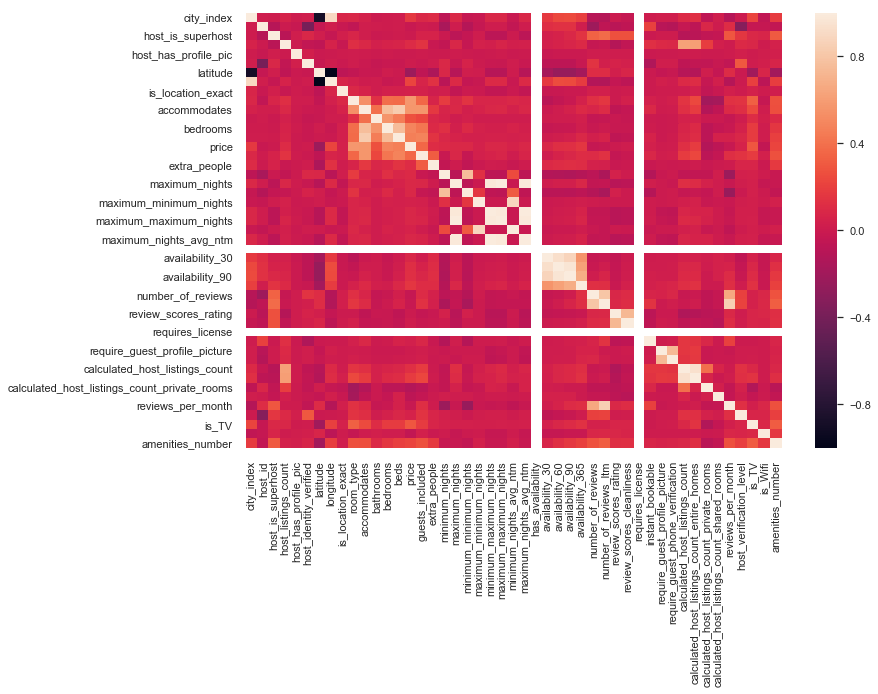

In [59]:
# creating the multicollinearity heatmap based on seaborn

plt.figure(figsize=(12,8))
sns.heatmap(all_listings.corr());
plt.show()

### FINAL DATASET PRIOR TO MODELING

In [64]:
Listings_Filtered = all_listings.filter(['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'room_type', 'accommodates', 'price', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'review_scores_rating', 'review_scores_cleanliness', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification', 'reviews_per_month', 'is_tv', 'is_Wifi', 'amenities_number'])
Listings_Filtered.head(10)

,host_is_superhost,host_has_profile_pic,host_identity_verified,room_type,accommodates,price,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating,review_scores_cleanliness,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,is_Wifi,amenities_number
0,1.0,1.0,0.0,2,2,50.0,1,0.0,3,60,95.0,10.0,1,1,1,2.01,1,38
1,0.0,1.0,0.0,3,2,88.0,1,42.0,3,30,99.0,10.0,0,1,1,1.02,1,28
2,0.0,1.0,1.0,3,4,130.0,2,10.0,3,28,96.0,9.0,0,1,0,1.70,1,34
3,0.0,1.0,0.0,2,2,30.0,1,10.0,1,5,NaN,NaN,0,0,0,0.65,1,15
4,1.0,1.0,0.0,2,2,50.0,1,0.0,3,14,96.0,10.0,1,1,1,1.50,1,22
5,1.0,1.0,0.0,2,2,60.0,1,35.0,2,100,96.0,9.0,1,0,0,1.01,1,18
6,0.0,1.0,0.0,2,2,55.0,1,13.0,2,14,94.0,9.0,0,0,0,1.13,1,15
7,0.0,1.0,0.0,2,1,30.0,1,0.0,1,14,95.0,9.0,1,0,1,3.12,1,28
8,1.0,1.0,1.0,2,6,55.0,2,30.0,1,12,96.0,10.0,0,0,0,4.95,1,36
10,0.0,1.0,1.0,3,5,147.0,3,0.0,3,365,91.0,9.0,0,0,0,0.37,1,22


In [65]:
# creating new csv so don't have to load large dataset every time
# Listings_Filtered.to_csv('Listings_Filtered.csv', index=False)

Listings_Filtered_V2 = pd.read_csv('Listings_Filtered.csv', low_memory=False)
Listings_Filtered_V2.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,room_type,accommodates,price,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating,review_scores_cleanliness,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,is_Wifi,amenities_number
0,1.0,1.0,0.0,2,2,50.0,1,0.0,3,60,95.0,10.0,1,1,1,2.01,1,38
1,0.0,1.0,0.0,3,2,88.0,1,42.0,3,30,99.0,10.0,0,1,1,1.02,1,28
2,0.0,1.0,1.0,3,4,130.0,2,10.0,3,28,96.0,9.0,0,1,0,1.70,1,34
3,0.0,1.0,0.0,2,2,30.0,1,10.0,1,5,NaN,NaN,0,0,0,0.65,1,15
4,1.0,1.0,0.0,2,2,50.0,1,0.0,3,14,96.0,10.0,1,1,1,1.50,1,22


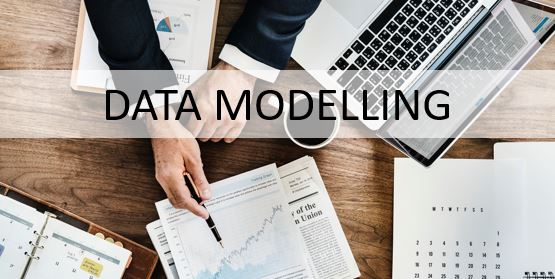

# PART 3 MODELING DATA ON AIRBNB LISTINGS ONLY

I will be skipping the usual Data Exploration part of OSEMN, please refer to my other jupyter notebook for EDA.

In [58]:
# checking the shape of the dataset

Listings_Filtered.shape

(40342, 18)

It looks like Airbnb reviewers are generous with their review scores.

In [59]:
# the target variable for predictive modeling will be the review scores rating; checking the scoring.

Listings_Filtered['review_scores_rating'].value_counts(normalize=True) 

100.0    0.240818
98.0     0.093540
97.0     0.083425
96.0     0.076205
99.0     0.070267
95.0     0.067850
93.0     0.057407
94.0     0.048874
90.0     0.045502
92.0     0.035536
80.0     0.033657
91.0     0.028166
87.0     0.018081
88.0     0.017753
89.0     0.017544
85.0     0.010294
86.0     0.007937
84.0     0.007758
60.0     0.006624
83.0     0.005908
70.0     0.004476
73.0     0.003073
82.0     0.002417
20.0     0.002089
40.0     0.001790
75.0     0.001701
67.0     0.001641
81.0     0.001492
76.0     0.001253
78.0     0.001223
77.0     0.000955
79.0     0.000776
50.0     0.000686
72.0     0.000537
74.0     0.000477
68.0     0.000388
71.0     0.000328
65.0     0.000269
47.0     0.000209
63.0     0.000179
64.0     0.000149
69.0     0.000119
53.0     0.000119
55.0     0.000090
30.0     0.000090
66.0     0.000060
52.0     0.000060
56.0     0.000060
58.0     0.000030
33.0     0.000030
37.0     0.000030
45.0     0.000030
57.0     0.000030
Name: review_scores_rating, dtype: float64

In [60]:
# considering anything scores rating more than 50% or higher has high rating

Listings_Filtered['review_scores_rating'].quantile(0.50)
Listings_Filtered.shape

(40342, 18)

In [61]:
Listings_Filtered_50 = Listings_Filtered[Listings_Filtered['review_scores_rating'] > Listings_Filtered['review_scores_rating'].quantile(0.50)]
Listings_Filtered_50.head(10)

,host_is_superhost,host_has_profile_pic,host_identity_verified,room_type,accommodates,price,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating,review_scores_cleanliness,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,is_Wifi,amenities_number
1,0.0,1.0,0.0,3,2,88.0,1,42.0,3,30,99.0,10.0,0,1,1,1.02,1,28
12,1.0,1.0,0.0,2,2,56.0,1,25.0,2,5,98.0,10.0,0,0,0,3.51,1,16
17,1.0,1.0,0.0,2,1,30.0,1,10.0,1,180,98.0,10.0,0,1,0,0.37,1,33
21,0.0,1.0,1.0,2,1,35.0,1,0.0,2,21,97.0,9.0,0,1,1,0.59,1,9
27,0.0,1.0,1.0,2,3,59.0,1,30.0,3,31,98.0,10.0,0,0,0,0.27,1,12
28,1.0,1.0,1.0,3,9,120.0,1,80.0,1,10,98.0,10.0,0,0,0,3.42,1,61
31,0.0,1.0,1.0,2,2,59.0,1,30.0,3,31,100.0,10.0,0,0,0,0.12,1,15
33,0.0,1.0,1.0,2,2,59.0,1,30.0,3,31,100.0,10.0,0,0,0,0.07,1,16
40,0.0,1.0,1.0,3,6,180.0,4,35.0,3,1125,97.0,10.0,0,1,1,0.86,1,18
45,1.0,1.0,1.0,2,3,110.0,2,35.0,2,14,99.0,10.0,0,0,0,2.77,1,13


In [62]:
Listings_Filtered_50.isnull().sum()

host_is_superhost                    7
host_has_profile_pic                 7
host_identity_verified               7
room_type                            0
accommodates                         0
price                                0
guests_included                      0
extra_people                         0
minimum_nights                       0
maximum_nights                       0
review_scores_rating                 0
review_scores_cleanliness           12
instant_bookable                     0
require_guest_profile_picture        0
require_guest_phone_verification     0
reviews_per_month                    1
is_Wifi                              0
amenities_number                     0
dtype: int64

In [63]:
Listings_Filtered_50['review_scores_rating'].fillna(Listings_Filtered_50['review_scores_rating'].mode()[0], inplace=True)
Listings_Filtered_50['review_scores_cleanliness'].fillna(Listings_Filtered_50['review_scores_cleanliness'].mode()[0], inplace=True)
Listings_Filtered_50['reviews_per_month'].fillna(Listings_Filtered_50['reviews_per_month'].mode()[0], inplace=True)
Listings_Filtered_50['host_has_profile_pic'].fillna(Listings_Filtered_50['host_has_profile_pic'].mode()[0], inplace=True)
Listings_Filtered_50['host_is_superhost'].fillna(Listings_Filtered_50['host_is_superhost'].mode()[0], inplace=True)
Listings_Filtered_50['host_identity_verified'].fillna(Listings_Filtered_50['host_identity_verified'].mode()[0], inplace=True)

In [64]:
Listings_Filtered_50.isnull().sum()

host_is_superhost                   0
host_has_profile_pic                0
host_identity_verified              0
room_type                           0
accommodates                        0
price                               0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
review_scores_rating                0
review_scores_cleanliness           0
instant_bookable                    0
require_guest_profile_picture       0
require_guest_phone_verification    0
reviews_per_month                   0
is_Wifi                             0
amenities_number                    0
dtype: int64

### SET TARGET VARIABLES

In [65]:
%%time

# defining the features 
features = Listings_Filtered_50.drop(["review_scores_rating"], axis=1)

# defining the target
target = Listings_Filtered_50[["review_scores_rating"]]

# create dummy variables
features = pd.get_dummies(features)

Wall time: 28.3 ms


In [66]:
# checking out the features
print(features.shape)
features.tail(5)

(16357, 17)


,host_is_superhost,host_has_profile_pic,host_identity_verified,room_type,accommodates,price,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_cleanliness,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,is_Wifi,amenities_number
23797,0.0,1.0,0.0,2,2,59.0,1,15.0,1,1125,10.0,1,0,0,2.0,1,16
23821,0.0,1.0,0.0,2,2,50.0,1,0.0,1,14,10.0,1,0,0,1.0,1,19
23852,0.0,1.0,0.0,2,3,36.0,1,15.0,1,1125,10.0,0,0,0,1.0,1,22
23858,0.0,1.0,0.0,3,6,89.0,2,10.0,1,1125,10.0,0,0,0,1.0,1,26
23861,1.0,1.0,0.0,3,4,210.0,4,30.0,1,1125,10.0,1,0,0,1.0,0,18


### REDUCING SAMPLE SIZE TO REDUCING PROCESSING TIME

In [67]:
# reducing the processing lines from million of lines to 1000 sample to avoid further PC harware crashes

X = Listings_Filtered.sample(1000).drop('review_scores_rating', axis=1)
y = Listings_Filtered.sample(1000).review_scores_rating
X = pd.get_dummies(X, drop_first=True)

### SPLITTING DATASET INTO TRAIN AND TEST SET

In [68]:
# splitting the data into train and test set ready for machine learning modelling

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4)

## BASIC PREDICTIVE MODELLING (BEFORE GOING DEEP)¶


SIDE NOTE:
When training a predictive models, it is crucial to be aware of over-fitting. This is when a model fits the training data well, but it is not able to generalize and make accurate predictions for data it has not seen before.

In order to minimize over-fitting in the model, we use a technique called cross-validation, where splitting data into two parts - the training set, and the testing set. The training set is used to train the model, while the testing set is only used to evaluate the model's performance. The metrics on the training set let us see how our model is progressing in terms of it's training, but it's metrics on the testing set that let us get a measurement of the accuracy of our model - That is how well it's able to make new predictions based on data it has not seen before.

In order to help answer the above questions, I will be utilizing the following predictive analytics models:

1. Logistic Regression
2. Random Forest
3. XGBoost
4. Support Vector Machine

#### LOGISTIC REGRESSION MODELLING
Regression is a technique used to predict the value of a response (dependent) variables, from one or more predictor (independent) variables, where the variable are numeric.

Linear and Logistic regression are the most basic form of regression which are commonly used. The essential difference between these two is that Logistic regression is used when the dependent variable is binary in nature. In contrast, Linear regression is used when the dependent variable is continuous and nature of the regression line is linear. Linear regression algorithms are used to predict/forecast values but logistic regression is used for classification tasks.


In [69]:
%%time

# starting the logistic regression
logreg = LogisticRegression()

# training
logreg.fit(X_train, y_train)

# predicting
train_preds = logreg.predict(X_train)
test_preds = logreg.predict(X_test)

# evaluating
train_accuracy_logreg = accuracy_score(y_train, train_preds)
test_accuracy_logreg = accuracy_score(y_test, test_preds)
report_logreg = classification_report(y_test, test_preds)

print("Logistic Regression")
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print(f"Training Accuracy: {(train_accuracy_logreg * 100):.3}%")
print(f"Test Accuracy:     {(test_accuracy_logreg * 100):.3}%")

Logistic Regression
+++++++++++++++++++++++++++++++++++++++++++++++++++++++
Training Accuracy: 54.0%
Test Accuracy:     54.3%
Wall time: 1.09 s


### RANDOM FOREST MODELLING

Random forest spun out of decision tree. It is better than decision tree. Take the analogy of having thousands of thinking machine make predictions for the traffic in the city of Melbourne between 4pm and 7pm. The thousands of thinking machine can make a combination of predictions, it is faster and use the wisdom of the crowd (in this case wisdom of the chips!).

On to the similar analogy of thousands of thinking machine - each decision machine (tree) in the thousands of machine (forest) considers a random subset of features when forming questions and only has access to a random set of the training data points. This rule therefore increases 'a distributed opinion/view' in the forest leading to more robust overall predictions. Henceforth the name ‘random forest.’ When it comes time to make a prediction, the random forest takes an average of all the individual decision tree estimates.

In [70]:
# creating a baseline
forest = RandomForestClassifier()

In [71]:
# creating Grid              
param_grid = {'n_estimators': [80, 100, 120],
              'criterion': ['gini', 'entropy'],
              'max_features': [5, 7, 9],         
              'max_depth': [5, 8, 10], 
              'min_samples_split': [3, 4, 5]}

# starring the tune random forest
forest_grid_search = GridSearchCV(forest, param_grid, cv=7, n_jobs=-1)

# training the tuned random forest
forest_grid_search.fit(X_train, y_train)

# printing best estimator parameters found during the grid search
print(forest_grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 5, 'min_samples_split': 5, 'n_estimators': 100}


In [72]:
%%time

# instantiating the tuned random forest with the best found parameters
forest = RandomForestClassifier(n_estimators=120, criterion='gini', max_features=9, 
                                max_depth=10, min_samples_split=4, random_state=4)

# training the random forest
forest.fit(X_train, y_train)

# predicting the random forest
train_preds = forest.predict(X_train)
test_preds = forest.predict(X_test)

# evaluating 
train_accuracy_forest = accuracy_score(y_train, train_preds)
test_accuracy_forest = accuracy_score(y_test, test_preds)
report_forest = classification_report(y_test, test_preds)

print("Random Forest")
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print(f"Training Accuracy: {(train_accuracy_forest * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_forest * 100):.4}%")

Random Forest
+++++++++++++++++++++++++++++++++++++++++++++++++++++++
Training Accuracy: 70.12%
Test Accuracy:     55.48%
Wall time: 3.4 s


### EXTREME BOOSTING (XGBOOST) MODELLING¶
The extreme boosting is an ensemble technique where new models are added to correct the errors made by existing models. One by one the new models are added sequentially until no further improvements can be made.

The gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models. This approach supports both regression and classification predictive modeling problems.

In [73]:
# creating a baseline
booster = xgb.XGBClassifier()

In [74]:
# creating the grid
param_grid = {'n_estimators': [100],
              'learning_rate': [0.05, 0.1], 
              'max_depth': [3, 5, 10],
              'colsample_bytree': [0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

# starting the tuned random forest
booster_grid_search = GridSearchCV(booster, param_grid, scoring='accuracy', cv=3, n_jobs=-1)

# training the tuned random forest
booster_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(booster_grid_search.best_params_)

{'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [75]:
%%time

# starting tuned xgboost
booster = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100,
                            colsample_bytree=0.7, gamma=0.1, random_state=4)

# training
booster.fit(X_train, y_train)

# predicting
train_preds = booster.predict(X_train)
test_preds = booster.predict(X_test)

# evaluating
train_accuracy_booster = accuracy_score(y_train, train_preds)
test_accuracy_booster = accuracy_score(y_test, test_preds)
report_booster = classification_report(y_test, test_preds)

print("XGBoost")
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print(f"Training Accuracy: {(train_accuracy_booster * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_booster * 100):.4}%")

XGBoost
+++++++++++++++++++++++++++++++++++++++++++++++++++++++
Training Accuracy: 63.2%
Test Accuracy:     55.3%
Wall time: 7.41 s


### SUPPORT VECTOR MACHINE MODELLING

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

In [76]:
%%time

# instantiating Support Vector Classification
svm = svm.SVC(kernel='rbf', random_state=4)

# training
svm.fit(X_train, y_train)

# predicting
train_preds = svm.predict(X_train)
test_preds = svm.predict(X_test)

# evaluating
train_accuracy_svm = accuracy_score(y_train, train_preds)
test_accuracy_svm = accuracy_score(y_test, test_preds)
report_svm = classification_report(y_test, test_preds)

print("Support Vector Machine")
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print(f"Training Accuracy: {(train_accuracy_svm * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_svm * 100):.4}%")

Support Vector Machine
+++++++++++++++++++++++++++++++++++++++++++++++++++++++
Training Accuracy: 85.79%
Test Accuracy:     49.76%
Wall time: 48.5 s


### INTERPRETATION OF PERFORMANCE MEASURES: PRECISION, RECALL AND F1 SCORE

I will be running SKLearn Metric to generation classification reporting. The following reporting will be generation, and I'd like provide some explanations of each reporting:

**> Precision Score**

Precision – Accuracy of positive predictions. Precision = TP/(TP + FP)

**> Recall Score**

Recall (aka sensitivity or true positive rate): Fraction of positives That were correctly identified. Recall = TP/(TP+FN)

**> F1 Score**

A helpful metric for comparing two classifiers. F1 Score takes into account precision and the recall. It is created by finding the the harmonic mean of precision and recall. F1 = 2 x (precision x recall)/(precision + recall)

**> Support**

The support is the number of samples of the true response that lie in that class.

**>The Reported Averages**

Micro average (averaging the total true positives, false negatives and false positives)

Macro average (averaging the unweighted mean per label)

Weighted average (averaging the support-weighted mean per label)

Sample average (only for multilabel classification).

In [77]:
print('Classification Report Logistic Regression: \n', report_logreg)
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('Classification Report Random Forest: \n', report_forest)
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++') 
print('Classification Report XGBoost: \n', report_booster)
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('Classification Report SVM: \n', report_svm)

Classification Report Logistic Regression: 
               precision    recall  f1-score   support

        97.0       0.40      0.09      0.15      1095
        98.0       0.29      0.28      0.28      1211
        99.0       0.35      0.14      0.20       949
       100.0       0.63      0.91      0.74      3288

   micro avg       0.54      0.54      0.54      6543
   macro avg       0.42      0.35      0.34      6543
weighted avg       0.49      0.54      0.48      6543

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report Random Forest: 
               precision    recall  f1-score   support

        97.0       0.42      0.16      0.23      1095
        98.0       0.29      0.32      0.31      1211
        99.0       0.34      0.29      0.31       949
       100.0       0.70      0.85      0.77      3288

   micro avg       0.55      0.55      0.55      6543
   macro avg       0.44      0.40      0.40      6543
weighted avg       0.52   

### PLOTTING INFLUENTIAL FACTORS BASED ON RANDOM FOREST

Through Random Forest, I have plotted 30 highest influential factors that predict review scores (agnostic of high or low review scores). The clear winners are reviews per month, whether the host is a super-host, the number of listed (maybe desirable amenities), and of course price (though surprisingly price is not the number one most influential factor here). 



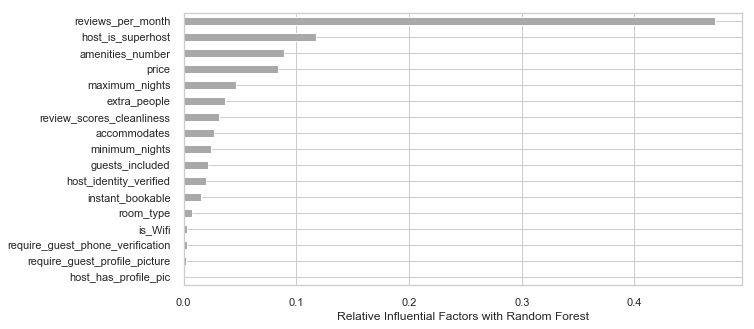

In [78]:
# plotting the influential factors - based on Random Forest
influential_factors = pd.Series(forest.feature_importances_, index=X.columns)
influential_factors.nlargest(30).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,5))
plt.xlabel('Relative Influential Factors with Random Forest');

## DEEP PREDICTIVE MODELING 

### MODEL 1: MULTI-LAYER PERCEPTRON NEURAL NETWORK WITH KERAS

Keras provides a high-level API abstraction for developing deep neural network models. There are a large number of core Layer types for standard neural networks.

The Keras Model forms the core of a Keras programme.

A Model is first constructed, then it is compiled. Next, the compiled model is trained and evaluated using their respective training and evaluation datasets. Upon successful evaluation using the relevant metrics, the model is then used for making predictions on previously unseen data samples.

Below is the 5-step life-cycle of a deep learning neural network using the Keras library.

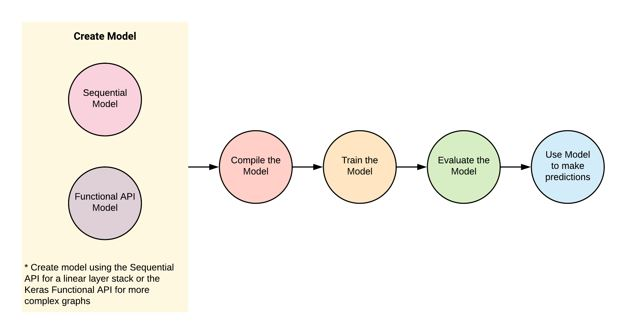

Some common and useful layer types you can choose from are:

Dense: Fully connected layer and the most common type of layer used on multi-layer perceptron models.
Dropout: Apply dropout to the model, setting a fraction of inputs to zero in an effort to reduce over fitting.
Merge: Combine the inputs from multiple models into a single model.
In Model 1, I starting with a simple dense layering.

In [79]:
# Model 1 - simple dense layering

input_shape = X_train.shape
model = Sequential()
model.add(Dense(12, kernel_initializer='uniform', activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                216       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [81]:
model_val = model.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 9814 samples, validate on 6543 samples
Epoch 1/5
9814/9814 [==============================] - 2s 159us/step - loss: -622.2790 - acc: 0.0000e+00 - val_loss: -1363.9424 - val_acc: 0.0000e+00
Epoch 2/5
9814/9814 [==============================] - 0s 25us/step - loss: -1520.7352 - acc: 0.0000e+00 - val_loss: -1559.5619 - val_acc: 0.0000e+00
Epoch 3/5
9814/9814 [==============================] - 0s 24us/step - loss: -1560.2711 - acc: 0.0000e+00 - val_loss: -1561.6579 - val_acc: 0.0000e+00
Epoch 4/5
9814/9814 [==============================] - 0s 25us/step - loss: -1561.0298 - acc: 0.0000e+00 - val_loss: -1561.9370 - val_acc: 0.0000e+00
Epoch 5/5
9814/9814 [==============================] - 0s 25us/step - loss: -1561.2289 - acc: 0.0000e+00 - val_loss: -1562.0199 - val_acc: 0.0000e+00


In [82]:
train_score = model.evaluate(X_train, y_train)
test_score = model.evaluate(X_test, y_test)
print('Train Score:', train_score)
print('Test Score:', test_score)

6543/6543 [==============================] - 0s 23us/step
Train Score: [-1561.2829226394133, 0.0]
Test Score: [-1562.013472137148, 0.0]


In [83]:
model_dict = model_val.history

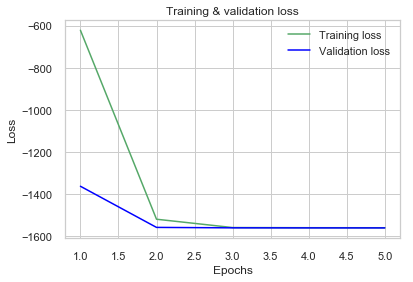

In [84]:
plt.clf()

loss_values = model_dict['loss']
val_loss_values = model_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'blue', label='Validation loss')

plt.title('Training & validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### MODEL 2: MULTI-LAYER PERCEPTRON NEURAL NETWORK WITH KERAS - WITH DENSER LAYER

In [85]:
# adding more and larger layers
input_shape = X_train.shape
model2 = Sequential()
model2.add(Dense(34, kernel_initializer='uniform', activation='relu', input_shape=(X_train.shape[1],)))
model2.add(Dense(68, kernel_initializer='uniform', activation='relu'))
model2.add(Dense(68, kernel_initializer='uniform', activation='relu'))
model2.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 34)                612       
_________________________________________________________________
dense_5 (Dense)              (None, 68)                2380      
_________________________________________________________________
dense_6 (Dense)              (None, 68)                4692      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 69        
Total params: 7,753
Trainable params: 7,753
Non-trainable params: 0
_________________________________________________________________


In [86]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [87]:
model_val2 = model2.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test))

Train on 9814 samples, validate on 6543 samples
Epoch 1/5
9814/9814 [==============================] - 2s 213us/step - loss: -1137.3888 - acc: 0.0000e+00 - val_loss: -1562.0786 - val_acc: 0.0000e+00
Epoch 2/5
9814/9814 [==============================] - 1s 53us/step - loss: -1561.4149 - acc: 0.0000e+00 - val_loss: -1562.0786 - val_acc: 0.0000e+00
Epoch 3/5
9814/9814 [==============================] - 1s 59us/step - loss: -1561.4191 - acc: 0.0000e+00 - val_loss: -1562.0786 - val_acc: 0.0000e+00
Epoch 4/5
9814/9814 [==============================] - 1s 53us/step - loss: -1561.4251 - acc: 0.0000e+00 - val_loss: -1562.0786 - val_acc: 0.0000e+00
Epoch 5/5
9814/9814 [==============================] - 1s 58us/step - loss: -1561.4326 - acc: 0.0000e+00 - val_loss: -1562.0786 - val_acc: 0.0000e+00


In [88]:
train_score2 = model2.evaluate(X_train, y_train)
test_score2 = model2.evaluate(X_test, y_test)
print('Train Score:', train_score2)
print('Test Score:', test_score2)

6543/6543 [==============================] - 0s 43us/step
Train Score: [-1561.4366025705067, 0.0]
Test Score: [-1562.0783070513694, 0.0]


In [89]:
model_dict2 = model_val2.history

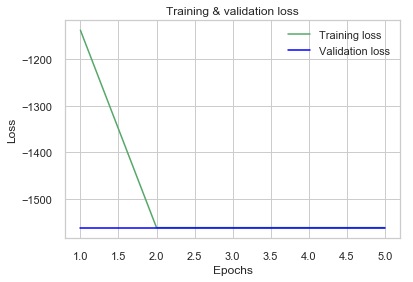

In [90]:
plt.clf()

loss_values = model_dict2['loss']
val_loss_values = model_dict2['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'blue', label='Validation loss')

plt.title('Training & validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

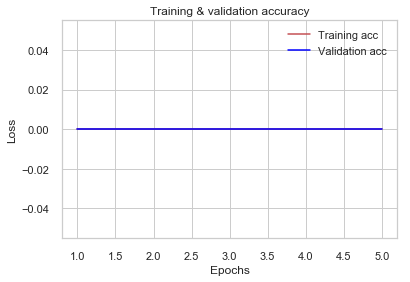

In [91]:
plt.clf()

acc_values = model_dict2['acc'] 
val_acc_values = model_dict2['val_acc']

plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.plot(epochs, val_acc_values, 'blue', label='Validation acc')
plt.title('Training & validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### MODEL 3: MULTI-LAYER PERCEPTRON NEURAL NETWORK WITH KERAS - WITH DROPOUT

In [92]:
# adding L2 Regularizer and more epochs and dropout layers
input_shape = X_train.shape
model3 = Sequential()
model3.add(Dense(34, kernel_initializer='normal', activation='relu', input_shape=(X_train.shape[1],)))
model3.add(Dense(68, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(68, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model3.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 34)                612       
_________________________________________________________________
dense_9 (Dense)              (None, 68)                2380      
_________________________________________________________________
dropout_1 (Dropout)          (None, 68)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 68)                4692      
_________________________________________________________________
dropout_2 (Dropout)          (None, 68)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 69        
Total

In [93]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [94]:
model_val3 = model3.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test))

Train on 9814 samples, validate on 6543 samples
Epoch 1/5
9814/9814 [==============================] - 3s 317us/step - loss: -1376.6212 - acc: 0.0000e+00 - val_loss: -1561.6394 - val_acc: 0.0000e+00
Epoch 2/5
9814/9814 [==============================] - 1s 75us/step - loss: -1561.0284 - acc: 0.0000e+00 - val_loss: -1561.6805 - val_acc: 0.0000e+00
Epoch 3/5
9814/9814 [==============================] - 1s 75us/step - loss: -1561.0126 - acc: 0.0000e+00 - val_loss: -1561.6948 - val_acc: 0.0000e+00
Epoch 4/5
9814/9814 [==============================] - 1s 77us/step - loss: -1561.0764 - acc: 0.0000e+00 - val_loss: -1561.7036 - val_acc: 0.0000e+00
Epoch 5/5
9814/9814 [==============================] - 1s 77us/step - loss: -1561.1006 - acc: 0.0000e+00 - val_loss: -1561.7112 - val_acc: 0.0000e+00


In [95]:
train_score3 = model3.evaluate(X_train, y_train)
test_score3 = model3.evaluate(X_test, y_test)
print('Train Score:', train_score3)
print('Test Score:', test_score3)

6543/6543 [==============================] - 0s 38us/step
Train Score: [-1561.1041321460016, 0.0]
Test Score: [-1561.7108754107444, 0.0]


In [96]:
model_dict3 = model_val3.history

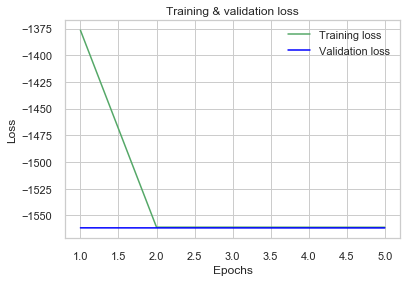

In [97]:
plt.clf()

loss_values = model_dict3['loss']
val_loss_values = model_dict3['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'blue', label='Validation loss')

plt.title('Training & validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

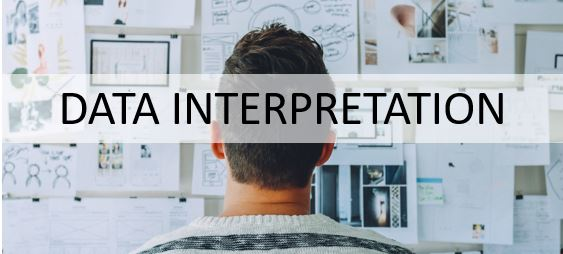


Let's summarize based on what we have produced so far.

Predictive Modeling Based on Logistic Regression, Random Forest, XGBoost, and SVM - Test Accuracy Results

**Logistic Regression:** 54.3%

**Random Forest:** 55.5%

**XGBoost:** 55.3%

**SVM:** 49.7%

Predictive Modeling Based on Deep Neural Network

**Layer 1, 2, 3:** Not able to produce interpretable results.

Top 5 Predictors Based on Random Forest Relative Features Importance:

1. Reviews per month

2. Host is a superhost

3. Amenities number

4. Price

5. Maximum nights

# CONCLUSION

While the basic predictive modeling produced reasonable test accuracy that swing between 50% and 55% mark; not high and not low enough to dismiss the results. 

I have failed to get interpretable result for deep learning (my other Jupyter Notebook Projects did better, somehow!). I have started to investigate a bit more on this matter (See Future Scope Section below).


# LIMITATIONS AND FUTURE SCOPE

### **LIMITATION**

1. I have been using the basic predictive modeling techniques such as support vector machine, logistic regression, XG Boost, and Random Forrest. I do like to explore other predictive modeling techniques such as:

a. Time series analysis

b. Principal component analysis

c. Ada boost

d. Semi-supervised learning

e. Reinforce learning.



### **FUTURE SCOPE** 

(The ideas for future scope mostly based on article that I read by S. Zayd Enam (http://ai.stanford.edu/~zayd/why-is-machine-learning-hard.html; this article inspired me to do more, and be a better data scientist)

1. Understanding the complexity between software engineering (this is where I have more exposure, daily!) and machine learning. *How can I draw the lessons from software engineering, and at the same time, understands the complexity while dealing with machine learning?*

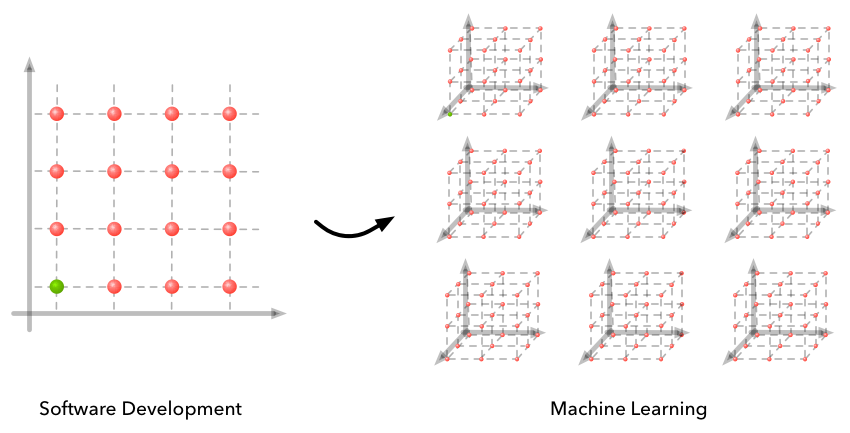


2. Better at debugging machine learning, as compared to software engineer debugging. *How can I be better at machine learning debugging?*

**DEBUGGING SOFTWARE ENGINEERING PERSPECTIVE**

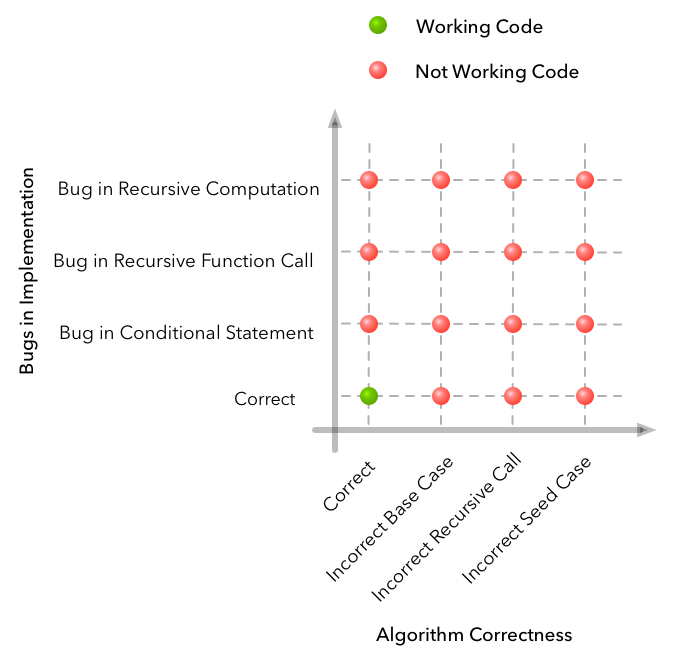

The debugging process then becomes a matter of combining the signals you have about the bug (compiler error messages, program outputs etc.) with your intuition on where the problem might be. These signals and heuristics help you prune the search space of possible bugs into something manageable.

**DEBUGGING MACHINE LEARNING PERSPECTIVE**

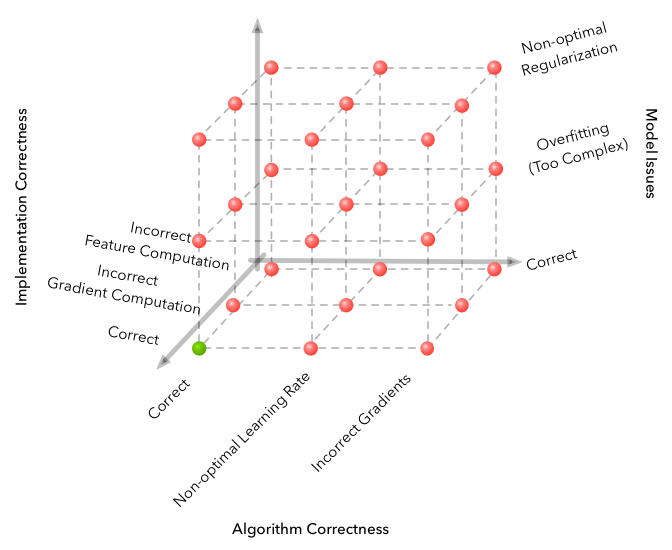

In the case of machine learning pipelines there are two additional dimensions along which bugs are common: the actual model and the data. To illustrate these dimensions, the simplest example is of training logistic regression using stochastic gradient descent. Here algorithm correctness includes correctness of the gradient descent update equations. Implementation correctness includes correct computations of the features and parameter updates. Bugs in the data often involve noisy labels, mistakes made in preprocessing, not having the right supervisory signal or even not enough data. Bugs in the model may involve actual limitations in the modeling capabilities. For example, this may be using a linear classifier when your true decision boundaries are non-linear.



# POCKET GUIDEBOOK

In the Medium Blog search for: 

1. Andrew Wong + How to better design data differentiator to solve heard problem.

2. Andrew Wong + How to sell your data insights to broader stakeholders.

3. Andrew Wong + The big three sticks (of data science tasks)


**Thank you for reading this Jupyter Notebook. Feedback is welcome, please email at andrewwongls@outlook.com**